<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Trading_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Started the project by following this tutorital of how to import financial Data
https://www.youtube.com/watch?v=t_vZDyQDUkk

In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [2]:
#define range of study
end = dt.datetime.now()
start = end - dt.timedelta(days = 7000)
start, end

(datetime.datetime(2005, 8, 20, 0, 35, 27, 848063),
 datetime.datetime(2024, 10, 19, 0, 35, 27, 848063))

In [3]:
#Choose stock tickers to study
#stocklist = ['NVDA', 'MSFT', 'TSLA', 'AAPL', 'CAVA']
#stockList = ['CBA', 'NAB', 'WBC', 'ANZ']
#stocks = [i + '.AX' for i in stockList]
stockList = ['NVDA', 'MSFT', 'AAPL', 'TSLA']
stocks = [i for i in stockList]
stocks

['NVDA', 'MSFT', 'AAPL', 'TSLA']

In [4]:
#pdr.DataReader(stocklist, 'yahoo', start, end)

df = yf.download(stocks, start, end)
df.head()

[*********************100%***********************]  4 of 4 completed


Price                     Adj Close                               Close  \
Ticker                         AAPL       MSFT      NVDA TSLA      AAPL   
Date                                                                      
2005-08-22 00:00:00+00:00  1.383431  18.884758  0.221338  NaN  1.638214   
2005-08-23 00:00:00+00:00  1.379510  18.856688  0.222791  NaN  1.633571   
2005-08-24 00:00:00+00:00  1.380416  18.814573  0.222943  NaN  1.634643   
2005-08-25 00:00:00+00:00  1.389162  18.968967  0.224472  NaN  1.645000   
2005-08-26 00:00:00+00:00  1.379510  18.926868  0.221033  NaN  1.633571   

Price                                                    High         ...  \
Ticker                          MSFT      NVDA TSLA      AAPL   MSFT  ...   
Date                                                                  ...   
2005-08-22 00:00:00+00:00  26.910000  0.241333  NaN  1.669643  27.17  ...   
2005-08-23 00:00:00+00:00  26.870001  0.242917  NaN  1.646429  27.07  ...   
2005-08-24 00:00:00+00:00  26.809999  0.243083  NaN  1.682857  27.16  ...   
2005-08-25 00:00:00+00:00  27.030001  0.244750  NaN  1.660357  27.09  ...   
2005-08-26 00:00:00+00:00  26.969999  0.241000  NaN  1.655000  27.08  ...   

Price                           Low           Open                            \
Ticker                         NVDA TSLA      AAPL       MSFT      NVDA TSLA   
Date                                                                           
2005-08-22 00:00:00+00:00  0.238500  NaN  1.648214  26.790001  0.242917  NaN   
2005-08-23 00:00:00+00:00  0.240250  NaN  1.637500  26.840000  0.241083  NaN   
2005-08-24 00:00:00+00:00  0.240167  NaN  1.628571  26.840000  0.241333  NaN   
2005-08-25 00:00:00+00:00  0.242083  NaN  1.647143  26.900000  0.244167  NaN   
2005-08-26 00:00:00+00:00  0.238667  NaN  1.647143  27.059999  0.245000  NaN   

Price                         Volume                            
Ticker                          AAPL      MSFT       NVDA TSLA  
Date                                                            
2005-08-22 00:00:00+00:00  387732800  41691700  547224000  NaN  
2005-08-23 00:00:00+00:00  295604400  48296700  254460000  NaN  
2005-08-24 00:00:00+00:00  572070800  63645000  514620000  NaN  
2005-08-25 00:00:00+00:00  276253600  39306300  296484000  NaN  
2005-08-26 00:00:00+00:00  261058000  36774600  323436000  NaN  

[5 rows x 24 columns]

In [5]:
df.index

DatetimeIndex(['2005-08-22 00:00:00+00:00', '2005-08-23 00:00:00+00:00',
               '2005-08-24 00:00:00+00:00', '2005-08-25 00:00:00+00:00',
               '2005-08-26 00:00:00+00:00', '2005-08-29 00:00:00+00:00',
               '2005-08-30 00:00:00+00:00', '2005-08-31 00:00:00+00:00',
               '2005-09-01 00:00:00+00:00', '2005-09-02 00:00:00+00:00',
               ...
               '2024-10-07 00:00:00+00:00', '2024-10-08 00:00:00+00:00',
               '2024-10-09 00:00:00+00:00', '2024-10-10 00:00:00+00:00',
               '2024-10-11 00:00:00+00:00', '2024-10-14 00:00:00+00:00',
               '2024-10-15 00:00:00+00:00', '2024-10-16 00:00:00+00:00',
               '2024-10-17 00:00:00+00:00', '2024-10-18 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4823, freq=None)

In [6]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'NVDA'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close', 'NVDA'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High', 'NVDA'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low', 'NVDA'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open', 'NVDA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume', 'NVDA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [7]:
Close = df.Close
Close.head()

Ticker,AAPL,MSFT,NVDA,TSLA
Date,,,,
2005-08-22 00:00:00+00:00,1.638214,26.910000,0.241333,NaN
2005-08-23 00:00:00+00:00,1.633571,26.870001,0.242917,NaN
2005-08-24 00:00:00+00:00,1.634643,26.809999,0.243083,NaN
2005-08-25 00:00:00+00:00,1.645000,27.030001,0.244750,NaN
2005-08-26 00:00:00+00:00,1.633571,26.969999,0.241000,NaN


In [8]:
Close.describe()

Ticker,AAPL,MSFT,NVDA,TSLA
count,4823.000000,4823.000000,4823.000000,3602.000000
mean,53.074656,107.766942,9.612307,77.850706
std,61.202124,114.775075,21.801814,103.362338
min,1.633571,15.150000,0.147500,1.053333
25%,8.992679,28.250000,0.380500,11.895000
50%,25.565001,45.939999,0.660750,17.656667
75%,66.793751,154.099998,6.554125,172.964996
max,235.000000,467.559998,138.070007,409.970001


<Axes: xlabel='Date'>

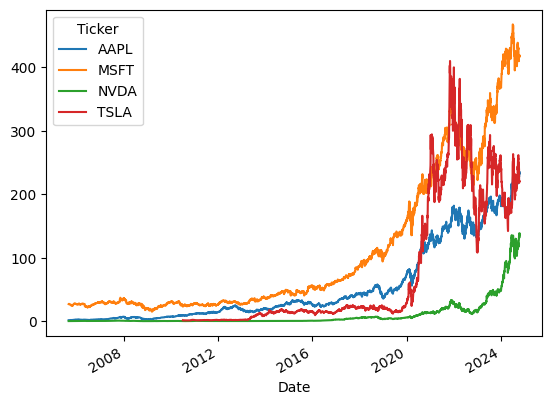

In [9]:
Close.plot()

# Twitter Data Collection
https://www.youtube.com/watch?v=AFeXivA7Hh4

In [10]:
#following this tutorial https://www.youtube.com/watch?v=AFeXivA7Hh4
import requests
import pandas as pd


In [11]:
twitter_data = []

In [12]:
payload = {
    'api_key': 'fc77ba882232c929cdaa788e34e06b92',
    'query':'Stock',
    'num': '10'

}
response = requests.get(
    'https://api.scraperapi.com/structured/twitter/search', params=payload)
data=response.json()

In [13]:
data

{'search_information': {'query_displayed': 'site:twitter.com "Stock"'},
 'organic_results': [{'position': 0,
   'title': 'MarketWatch',
   'snippet': "Netflix's stock is gaining — but investors should get ready for the new reality.",
   'highlighs': ['stock'],
   'link': 'https://twitter.com/marketwatch',
   'displayed_link': '4.6M+ followers'},
  {'position': 1,
   'title': 'Brad Freeman (@StockMarketNerd) ...',
   'snippet': 'I write Stock Market Nerd Newsletter for 40K+ Readers Across 173 Countries -- Subscribe for Free; Masters in Finance; @Umich x 2| 🇺🇸',
   'highlighs': ['Stock'],
   'link': 'https://twitter.com/stockmarketnerd',
   'displayed_link': '147.6K+ followers'},
  {'position': 2,
   'title': 'Stock Analyst135 (@SAnalyst135) ...',
   'snippet': 'If Investing for the long term, invest based on your study & conviction.. Use social media for learning & stock ideas..',
   'highlighs': ['stock'],
   'link': 'https://twitter.com/sanalyst135',
   'displayed_link': '17.6K+ follo

# Reddit Data Collection

https://www.youtube.com/watch?v=8KrUCXlAN4Q

In [14]:
!pip install praw
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 4.5 MB/s eta 0:00:00


In [19]:
import praw
import asyncpraw
import asyncio
from datetime import datetime, timedelta

In [16]:
reddit = praw.Reddit(client_id='pY3DRqwGM2HOIsepjKe3tg',
                     client_secret='qHWhNgd3AsLI6R7jiqHNiowS37PZyQ',
                     user_agent='StockBot')

In [17]:
subreddit = reddit.subreddit('wallstreetbets')

for post in subreddit.hot(limit=10):
    print(f"Title: {post.title}")
    # print(f"Content: {post.selftext}")
    print(f"Author: {post.author}")
    print(f"Upvotes: {post.score}")
    print(f"Comments: {post.num_comments}")
    print(f"URL: {post.url}")
    # print('-' * 80)
    submission = reddit.submission(id=post.id)
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        print(comment.body)



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: Weekend Discussion Thread for the Weekend of October 18, 2024
Author: wsbapp
Upvotes: 57
Comments: 1173
URL: https://www.reddit.com/r/wallstreetbets/comments/1g6r6k4/weekend_discussion_thread_for_the_weekend_of/


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Imagine trading without the internet. Having to call a broker and be like “buy OTM 0DTE calls at 2pm today lol”
We pump until elections and then start a new bull market after elections.
The best comments are always after hours when only the most regarded are still here ![img](emote|t5_2th52|8882)
log out bro, that money not coming back
One of the highlights of this week was the guy who typo-ed himself into a bambet for SPY 284 ![img](emote|t5_2th52|4271)
i miss pre 2020 WSB. This one sucks. ![img](emote|t5_2th52|4260)
You can't spell "the worst fucking stock I have ever laid my eyes upon" without the letters T-S-L-A
Nvidia today was like watching old people fuck
If you don't have 100k to throw into risky options then you should have chosen your parents more wisely
13K losses in the last week, on puts expired today. If my luck holds out, get ready for a crash next week.
Some lady in the 90s: "Oh just one glass of wine won't hurt my baby!"

That baby today: "Time to buy puts" 🤡
GF left m

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 3 | **First Seen In WSB** | 4 weeks ago
**Total Comments** | 23 | **Previous Best DD** | 
**Account Age** | 3 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Don’t worry, you’ve still got time to lose it all.
Just in time to lose it all on futures and index trading
Get out now, walk away while you can
Are you on $DRUG?
Take the W and wait a week for North Korea to start ww3, profit.
Congrats man. This is what happens when you don’t give up like some of these losers posting lame excuses about how they’re “never trading again because their family left them and they’re bankrupt”. The market gods always save those that have faith
We took different paths, but ended up in the same place ;)

https://preview.redd.it/rl8mshfo0lvd1.png?width=1080&format=pjpg&auto=webp&s=2b4e57910f0c7ee0efce1faeee4024734a130935

Congratulations m8
Someone is having Wendy’s tonight and not from the dumpster this time.
All you regards ma

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 3 | **First Seen In WSB** | 3 years ago
**Total Comments** | 43 | **Previous Best DD** | 
**Account Age** | 3 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
My strategy

https://preview.redd.it/k7bwsmlpygvd1.jpeg?width=500&format=pjpg&auto=webp&s=ea9017f6b23c2125da572f525a6bf4d4b2d598eb
There’s always stuff going on, don’t try to carry the weight of world. Rather look upon your loved ones, make grandma proud.
Inflation? That just means the amount of money goes up. It’s literally free gains.
The market has been gargling Shrek cum and none of that other stuff matters. The US continues to have the greatest economy in the world
Being a perma bear has to be considered at least some sort of mental illness
Inflation - around 2%,even below 2% in EU


Recession - many aspect still points out on strong economies. Good thing is that many indicators like ISM manufacturing are still recessionary,so bottom could have alr

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | 4 months ago
**Total Comments** | 15 | **Previous Best DD** | 
**Account Age** | 5 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Yet the chicken is still raw ![img](emote|t5_2th52|31225)
Intel only company with its own factories in US rest just use TSMC
Intel has supposedly not even received almost any of the money from the CHIPs act due to governmental stalling. Kinda difficult to budget for building a new manufacturing complex when the money to build it still hasn't been delivered.

https://finance.yahoo.com/news/billions-chips-act-funding-were-093000625.html
Almost as if one is the only domestic chip producer with fabs in the US
Crazy how much people are biased towards recent events, yes Intel is at an all time low but so was AMD not that long ago with a lot less going on for them.
Would be cool if Intel wasn't run like shit.
The government invested nana's money
They didnt gi

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 10 | **First Seen In WSB** | 3 years ago
**Total Comments** | 2610 | **Previous Best DD** | 
**Account Age** | 4 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Infinite dilution to buy and hold bitcoin might just be the greatest grift any grifter has ever grifted.

This guy is a total fucking nerd, his twitter is mostly him posting ai pictures of himself as a bitcoin cowboy or knight or some other weird incel shit. 

Perfect candidate for worlds richest man.
MSTR has been pumping every Thursday/Friday the last 4 weeks. Up 53%   
Short it on Monday, call on Thursday
Don’t tempt me with a good time
As impressive Bitcoin has been holy leverage Michael! He's winning and he knows it.
[Michael Saylor - We Call Them Poor](https://www.youtube.com/watch?v=B5if2hthPCs)

We are going up forever Laura!
older man in a graphic t-shirt blazer combination?

So this is where all the E3 Expo presenters went too after it got 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 3 | **First Seen In WSB** | 3 years ago
**Total Comments** | 27 | **Previous Best DD** | 
**Account Age** | 6 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Ngl that’s real profit margins right there lol $51k to $164k 👏
r/investing is that way, good sir.
Sheeesh at this point you just need to keep holding and ride the wave.
I didn't quite catch the bottom like you. My basis is $235/share..

Still happy with my gains and happy to see another person do so well.
What made you decide to put 50k into Netflix?
I dream of making a post like this one day. Nice!
Bro bought shares 😂🤣 (I do too)
What's crazy is that the $2.1 B everyone is creaming themselves over is about half what FNMA and FMCC post all the time, yet they are in the shitter.
Congrats
Congratulations! Netflix at $240 cost, is great! I am in almost the exact same boat as you. 150 shares at $226 cost. It’s a nice win for sure!
100k can bang some nice ch

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | 4 days ago
**Total Comments** | 2 | **Previous Best DD** | 
**Account Age** | 6 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
$12B market cap does seem low for the 6th most visited website on earth
My elderly father was googling a question about a car last night. He ended up on Reddit where he read a thread for 15 minutes and got his question answered. He says - “Wow, this Reddit is pretty cool”. 

So yeah, I’m bullish.
Last week one of our biggest national news networks in a Balkan country posted a Reddit story about the guy with the pennies in the jar. Very bullish.
Been feeding Reddit garbage content to sabotage AI
tldr seems a bit too long, puts? yeah sure im in
If AI learns from Reddit then we’re gonna have a sarcastic, wise ass, song lyric future ahead of us.
If you use a company's product and you think it's a great product, then you should buy stock straight away.  

Your

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 2 | **First Seen In WSB** | 20 hours ago
**Total Comments** | 1 | **Previous Best DD** | 
**Account Age** | 2 months | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
[removed]
I was told Apple was fucked in China
Buffett looked at the scythe in his hand and never in his life thought he‘d be called a leek![img](emote|t5_2th52|4271)
Apple is popular in China
APPL has really high sales in China
Apple is the most stable stock at present
it is also thanks to the discounts
Apple phones are really good![img](emote|t5_2th52|4258)
APPL, give me a rush!!!
Super. Cycle 🤑
That’s good news
What to expect from it
What are the services part? Also kinda crazy that smart watches make more in sales than macs do. I love macs but hate everything else of their ecosystem.
It’s absolutely insane how many resellers will come to America for the sole purpose of buying as many iPhones as possible to send back, anecdotally Chinese then you ha

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 3 | **First Seen In WSB** | 3 years ago
**Total Comments** | 4309 | **Previous Best DD** | 
**Account Age** | 13 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Put the crayons down
That’s a couple orders of magnitude there! Somebody found Elon’s K
Doesn’t he see worse when he puts the glasses one in this scene 😂
Lmfaooooo
Quick reminder that Tesla and X purchase millions of dollars worth of GPU's but Nvidia will never purchase a single car from Tesla.
Crayon detected! Brace for impact ![img](emote|t5_2th52|4640)
Nvidia makes something that works better than anyone else’s that thing. Tesla is a hype wagon whose wheels are falling off, along with the door panels and the mirror and the gas pedals…
![img](emote|t5_2th52|18630)![img](emote|t5_2th52|18630)![img](emote|t5_2th52|18630)
Bro is smoking opium more than a Chinese official in 1800s
I like it.  Im in.  I just refinanced my house
Marketcap:  am I a joke t

In [20]:
#will be collecting data from the last 5 years
five_years_ago = datetime.utcnow() - timedelta(days=5*365)
five_years_ago_timestamp = int(five_years_ago.timestamp())

In [23]:
top_posts = []
for post in subreddit.top(time_filter='all', limit=10000):  # Fetch more posts to ensure we get 10 within the past 5 years
    # Check if the post is within the past 5 years
    if post.created_utc >= five_years_ago_timestamp:
        top_posts.append(post)
    if len(top_posts) >= 10000:
        break  # We have collected the top 10 posts within the past 5 years

print(f"Collected {len(top_posts)} posts from the past 5 years.")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Collected 940 posts from the past 5 years.


In [24]:
print(top_posts)

[Submission(id='l8rf4k'), Submission(id='l6wu59'), Submission(id='l78uct'), Submission(id='l846a1'), Submission(id='l881ia'), Submission(id='l6x130'), Submission(id='lnqgz8'), Submission(id='l6ekdz'), Submission(id='lae6j0'), Submission(id='l7feld'), Submission(id='l8c0u4'), Submission(id='l890i7'), Submission(id='l6jobf'), Submission(id='l79x17'), Submission(id='l90oq6'), Submission(id='l74tr1'), Submission(id='l9kn3z'), Submission(id='lazmky'), Submission(id='l79jko'), Submission(id='l7nces'), Submission(id='msblc3'), Submission(id='lb8jtk'), Submission(id='l7z8pf'), Submission(id='m0q5bm'), Submission(id='l7c6kb'), Submission(id='m4i2ib'), Submission(id='lb6jld'), Submission(id='l7bh1m'), Submission(id='lawubt'), Submission(id='l70b59'), Submission(id='l78yde'), Submission(id='l8tw56'), Submission(id='l92fas'), Submission(id='lafh4d'), Submission(id='lt7v4w'), Submission(id='l7aj2e'), Submission(id='la8n7o'), Submission(id='lbykxg'), Submission(id='l7weuu'), Submission(id='l7qwvo'),